# Learning to Navigate with Deep Reinforcement Learning

---

This notebook solves the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

The basic structure of the code of this notebook, as well as the dqn_agent, train, and model modules, borrows heavily from example code from the Udacity course. I improved on it in various ways as described in Report.pdf.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from dqn_agent import Agent
from train import dqn
from utils import scores_to_file


env = UnityEnvironment(file_name="Banana.app", no_graphics=True)

# Select the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


In [2]:
# Whether to use Double DQN (instead of vanilla DQN)
ddqn = True

# If ddqn is True, whether to use mean(Q1, Q2) (instead of random_choice(Q1, Q2))
ddqn_mean = False


if not ddqn:
    # DQN
    agent = Agent(state_size, action_size, seed=0, update_every=4)
    scores = dqn(env, agent, brain_name, eps_start=0.4)
else:
    # Double DQN
    agent = Agent(state_size, action_size, seed=0, ddqn=ddqn, ddqn_mean=ddqn_mean)
    scores = dqn(env, agent, brain_name)

Creating new Double DQN agent that moves using random_choice(Q1, Q2) with gamma = 0.95
Initializing replay buffer with buffer size 30000 and batch size 64
Episode 8	Eps: 0.048	Score: -1	Max Score: 1	Average Score Last 10: -0.12	Average Score Last 100: -0.12	
Episode 16	Eps: 0.046	Score: 2	Max Score: 3	Average Score Last 10: 1.30	Average Score Last 100: 0.75	
Episode 24	Eps: 0.044	Score: 5	Max Score: 6	Average Score Last 10: 3.50	Average Score Last 100: 1.79	
Episode 33	Eps: 0.042	Score: 6	Max Score: 10	Average Score Last 10: 6.00	Average Score Last 100: 2.971	
Episode 41	Eps: 0.041	Score: 16	Max Score: 16	Average Score Last 10: 7.30	Average Score Last 100: 3.83	
Episode 49	Eps: 0.039	Score: 14	Max Score: 16	Average Score Last 10: 8.70	Average Score Last 100: 4.53	
Episode 58	Eps: 0.037	Score: 6	Max Score: 17	Average Score Last 10: 10.30	Average Score Last 100: 5.361	
Episode 66	Eps: 0.036	Score: 8	Max Score: 17	Average Score Last 10: 8.00	Average Score Last 100: 5.739	
Episode 74	Eps: 

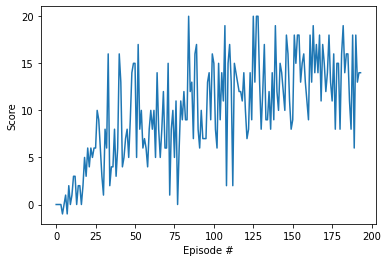

In [3]:
# Plot the scores from one run
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
# Close environment when done
env.close()

In [ ]:
# Run all 3 models 5 times each (this takes a long time)
for seed in range(5):
    # DQN
    agent = Agent(state_size, action_size, seed, update_every=4)
    scores = dqn(env, agent, brain_name, n_episodes=1000, eps_start=0.4)
    scores_to_file(scores, "results/dqn/" + str(seed) + ".txt")
    # Double DQN, choose moves using mean(Q1, Q2)
    agent = Agent(state_size, action_size, seed, ddqn=True)
    cores = dqn(env, agent, brain_name)
    scores_to_file(scores, "results/ddqn/" + str(seed) + ".txt")
    # Double DQN, choose moves using random_choice(Q1, Q2)
    agent = Agent(state_size, action_size, seed, ddqn=True, ddqn_mean=False)
    scores = dqn(env, agent, brain_name)
    scores_to_file(scores, "results/ddqn_rand/" + str(seed) + ".txt")
